In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Data01.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df1=df.copy()
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df1.drop('CustomerID', axis=1, inplace=True)

In [8]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df1['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
df_rows , df_cols = df1.shape
print(df_rows)
print(df_cols)

200
4


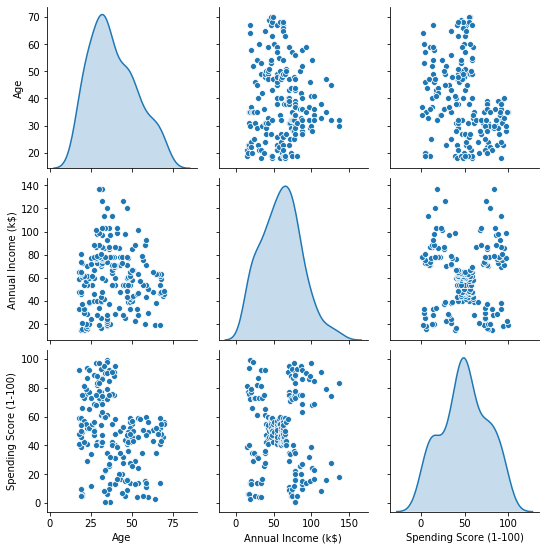

In [11]:
import seaborn as sns
sns.pairplot(df1,diag_kind='kde')

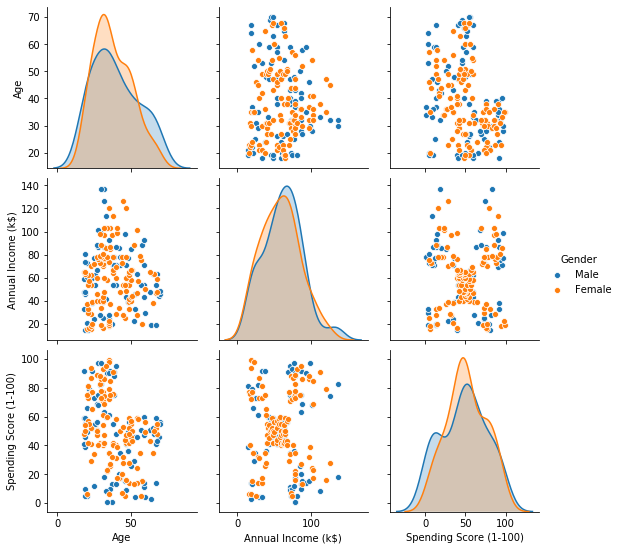

In [12]:
sns.pairplot(df1,diag_kind='kde', hue='Gender')

In [14]:
df1.drop('Gender', axis=1, inplace=True)

In [15]:
df1_scaled = df1.apply(zscore)

In [16]:
df1_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [17]:
model = KMeans(n_clusters = 3)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df1_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,389.386189
2,3,295.212246
3,4,205.225147
4,5,168.247580
5,6,133.868421
6,7,117.011555
7,8,103.825861
8,9,92.013131
9,10,82.430804


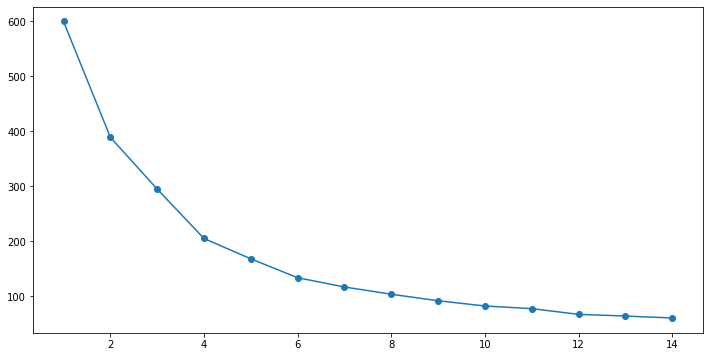

In [33]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

here we are taking the value of k as 6

In [34]:
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)

In [35]:
kmeans.fit(df1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [36]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.47895722, -1.30822992, -1.19644353],
       [-0.44191719,  0.99158305,  1.23950275],
       [-0.87309844, -0.11378508, -0.09358039],
       [ 0.22171558,  1.08322527, -1.29005223],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.97602698, -1.32549704,  1.0371827 ]])

In [37]:
centroid_df = pd.DataFrame(centroids, columns = list(df1_scaled) )
centroid_df


,Age,Annual Income (k$),Spending Score (1-100)
0,0.478957,-1.308230,-1.196444
1,-0.441917,0.991583,1.239503
2,-0.873098,-0.113785,-0.093580
3,0.221716,1.083225,-1.290052
4,1.254721,-0.240213,-0.043998
5,-0.976027,-1.325497,1.037183


In [38]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [39]:
df_labeled = df1.join(df_labels)

In [40]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis

,Age,Annual Income (k$),Spending Score (1-100),labels
0,19,15,39,5
1,21,15,81,5
2,20,16,6,0
3,23,16,77,5
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [41]:
df_labeled['labels'].value_counts()

4    45
1    39
2    38
3    33
5    24
0    21
Name: labels, dtype: int64

In [42]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

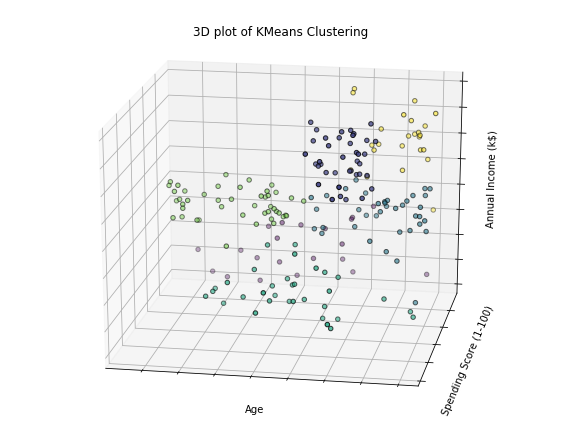

In [48]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df1_scaled)
labels = kmeans.labels_
ax.scatter(df1_scaled.iloc[:, 0], df1_scaled.iloc[:, 1], df1_scaled.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('3D plot of KMeans Clustering')